In [0]:
#!date

Sun Apr  7 22:03:46 UTC 2019


In [0]:
#!sudo apt update

Hit:2 http://security.debian.org stretch/updates InRelease                     
Ign:3 http://deb.debian.org/debian stretch InRelease                           
Get:4 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]
Get:5 http://deb.debian.org/debian stretch-backports InRelease [91.8 kB] 
Hit:6 http://packages.cloud.google.com/apt cloud-sdk-stretch InRelease   
Hit:7 http://deb.debian.org/debian stretch Release                       
Hit:8 http://packages.cloud.google.com/apt google-compute-engine-stretch-stable InRelease
Hit:9 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-stretch InRelease
Get:10 https://nvidia.github.io/libnvidia-container/debian9/amd64  InRelease [1,108 B]
Get:11 https://nvidia.github.io/nvidia-container-runtime/debian9/amd64  InRelease [1,105 B]
Get:12 https://nvidia.github.io/nvidia-docker/debian9/amd64  InRelease [1,098 B]
Hit:13 https://download.docker.com/linux/debian stretch InRelease
Hit:14 https://deb.nodesource.co

In [0]:
#!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2+deb9u1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
#!sudo pip3 --version

pip 9.0.1 from /usr/lib/python3/dist-packages (python 3.5)


In [0]:
#!sudo pip3 install numpy

In [0]:
#!sudo pip3 install pandas

In [0]:
#!sudo pip3 install matplotlib

In [0]:
#!sudo pip3 install tensorflow


In [31]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.15.0


In [9]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Normalized.csv to Bank_Personal_Loan_Normalized.csv


In [0]:
mydf = pd.read_csv("Bank_Personal_Loan_Normalized.csv", skiprows = 0)

In [11]:
mydf.head(8)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,norm_age,norm_exp,norm_family,norm_income,norm_CCAvg,norm_education,norm_mortgage
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.045455,0.086957,1.000000,0.189815,0.16,0.0,0.000000
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.500000,0.478261,0.666667,0.120370,0.15,0.0,0.000000
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.363636,0.391304,0.000000,0.013889,0.10,0.0,0.000000
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.272727,0.260870,0.000000,0.425926,0.27,0.5,0.000000
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.272727,0.239130,1.000000,0.171296,0.10,0.5,0.000000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.318182,0.347826,1.000000,0.097222,0.04,0.5,0.244094
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0.681818,0.652174,0.333333,0.296296,0.15,0.5,0.000000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,0.613636,0.586957,0.000000,0.064815,0.03,1.0,0.000000


In [12]:
mydf.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,norm_age,norm_exp,norm_family,norm_income,norm_CCAvg,norm_education,norm_mortgage
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,0.136364,0.130435,0.000000,0.148148,0.19,1.0,0.000000
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,0.159091,0.152174,1.000000,0.032407,0.04,0.0,0.133858
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,0.909091,0.913043,0.333333,0.074074,0.03,1.0,0.000000
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,0.954545,0.934783,0.666667,0.189815,0.05,0.5,0.000000
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1,0.113636,0.152174,0.666667,0.347222,0.08,0.0,0.000000


In [0]:
train = mydf.sample(frac=0.7, random_state=138)
test = mydf.drop(train.index)

mydfnparray_train = train.values
mydfnparray_test = test.values

TrainData   = mydfnparray_train[:, 10:]
TrainLabels = mydfnparray_train[:, [9]]

TestData = mydfnparray_test[:, 10:]
TestLabels = mydfnparray_test[:, [9]]

In [0]:
#TrainData   = mydfnparray[:, 10:]
#TrainLabels = mydfnparray[:, [9]]

In [14]:
TrainData

array([[0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.32755905],
       [0.        , 0.        , 1.        , ..., 0.54      , 0.5       ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.15      , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.22      , 0.5       ,
        0.37165354],
       [0.        , 0.        , 1.        , ..., 0.04      , 0.        ,
        0.27874016],
       [0.        , 0.        , 0.        , ..., 0.14      , 1.        ,
        0.16062992]])

In [15]:
TrainLabels

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [33]:
print(len(mydf))
print(len(TrainData))
print(len(TestData))
print(TestData.shape)
print(TestLabels.shape)
print(predictions.shape)

5000
3500
1500
(1500, 11)
(1500, 1)
(1500, 2)


In [183]:
TrainData = TrainData.astype('float')
TrainData

array([[0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.32755905],
       [0.        , 0.        , 1.        , ..., 0.54      , 0.5       ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.15      , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.22      , 0.5       ,
        0.37165354],
       [0.        , 0.        , 1.        , ..., 0.04      , 0.        ,
        0.27874016],
       [0.        , 0.        , 0.        , ..., 0.14      , 1.        ,
        0.16062992]])

In [184]:
TrainLabels = TrainLabels.astype('int')
TrainLabels

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
model = keras.Sequential([
    keras.layers.Dense(7, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
]) 

In [0]:
model.compile(
              optimizer='adamax', 
              #optimizer='SGD', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [195]:
model.fit(TrainData, TrainLabels, epochs=100)

Train on 3500 samples
Epoch 1/100
3500/3500 [==============================] - 0s 50us/sample - loss: 0.0612 - acc: 0.9809
Epoch 2/100
3500/3500 [==============================] - 0s 47us/sample - loss: 0.0612 - acc: 0.9806
Epoch 3/100
3500/3500 [==============================] - 0s 48us/sample - loss: 0.0611 - acc: 0.9809
Epoch 4/100
3500/3500 [==============================] - 0s 50us/sample - loss: 0.0610 - acc: 0.9814
Epoch 5/100
3500/3500 [==============================] - 0s 51us/sample - loss: 0.0610 - acc: 0.9814
Epoch 6/100
3500/3500 [==============================] - 0s 50us/sample - loss: 0.0610 - acc: 0.9809
Epoch 7/100
3500/3500 [==============================] - 0s 50us/sample - loss: 0.0609 - acc: 0.9809
Epoch 8/100
3500/3500 [==============================] - 0s 49us/sample - loss: 0.0609 - acc: 0.9809
Epoch 9/100
3500/3500 [==============================] - 0s 50us/sample - loss: 0.0609 - acc: 0.9809
Epoch 10/100
3500/3500 [==============================] - 0s 48us/sam

In [196]:
train_loss, train_acc = model.evaluate(TestData, TestLabels)

print('Train accuracy:', train_acc)

1500/1500 [==============================] - 0s 39us/sample - loss: 0.0483 - acc: 0.9847
Train accuracy: 0.98466665


In [120]:
predictions = model.predict(TestData)
predictions

array([[9.9999392e-01, 6.0357629e-06],
       [9.9983692e-01, 1.6308266e-04],
       [9.7641480e-01, 2.3585156e-02],
       ...,
       [9.6113670e-01, 3.8863238e-02],
       [9.9997473e-01, 2.5213201e-05],
       [9.9999797e-01, 2.0195175e-06]], dtype=float32)

In [0]:
class_names = ['No', 'Yes']

In [0]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [123]:
print(type(TestLabels))
TestLabels_int = TestLabels.astype(int)
print(type(TestLabels_int))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


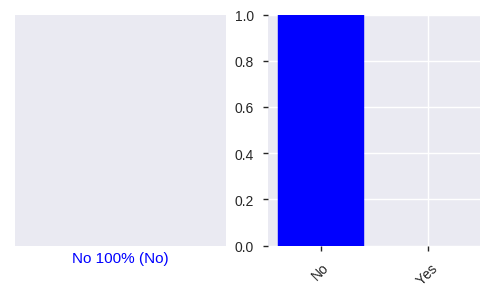

In [124]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, TestLabels_int)
plt.subplot(1,2,2)
plot_value_array(i, predictions, TestLabels_int)
plt.xticks(range(2), class_names, rotation=45)
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [125]:
predictions[0]

array([9.999939e-01, 6.035763e-06], dtype=float32)

In [126]:
print(predictions)


[[9.9999392e-01 6.0357629e-06]
 [9.9983692e-01 1.6308266e-04]
 [9.7641480e-01 2.3585156e-02]
 ...
 [9.6113670e-01 3.8863238e-02]
 [9.9997473e-01 2.5213201e-05]
 [9.9999797e-01 2.0195175e-06]]


In [127]:
print(TestLabels_int)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


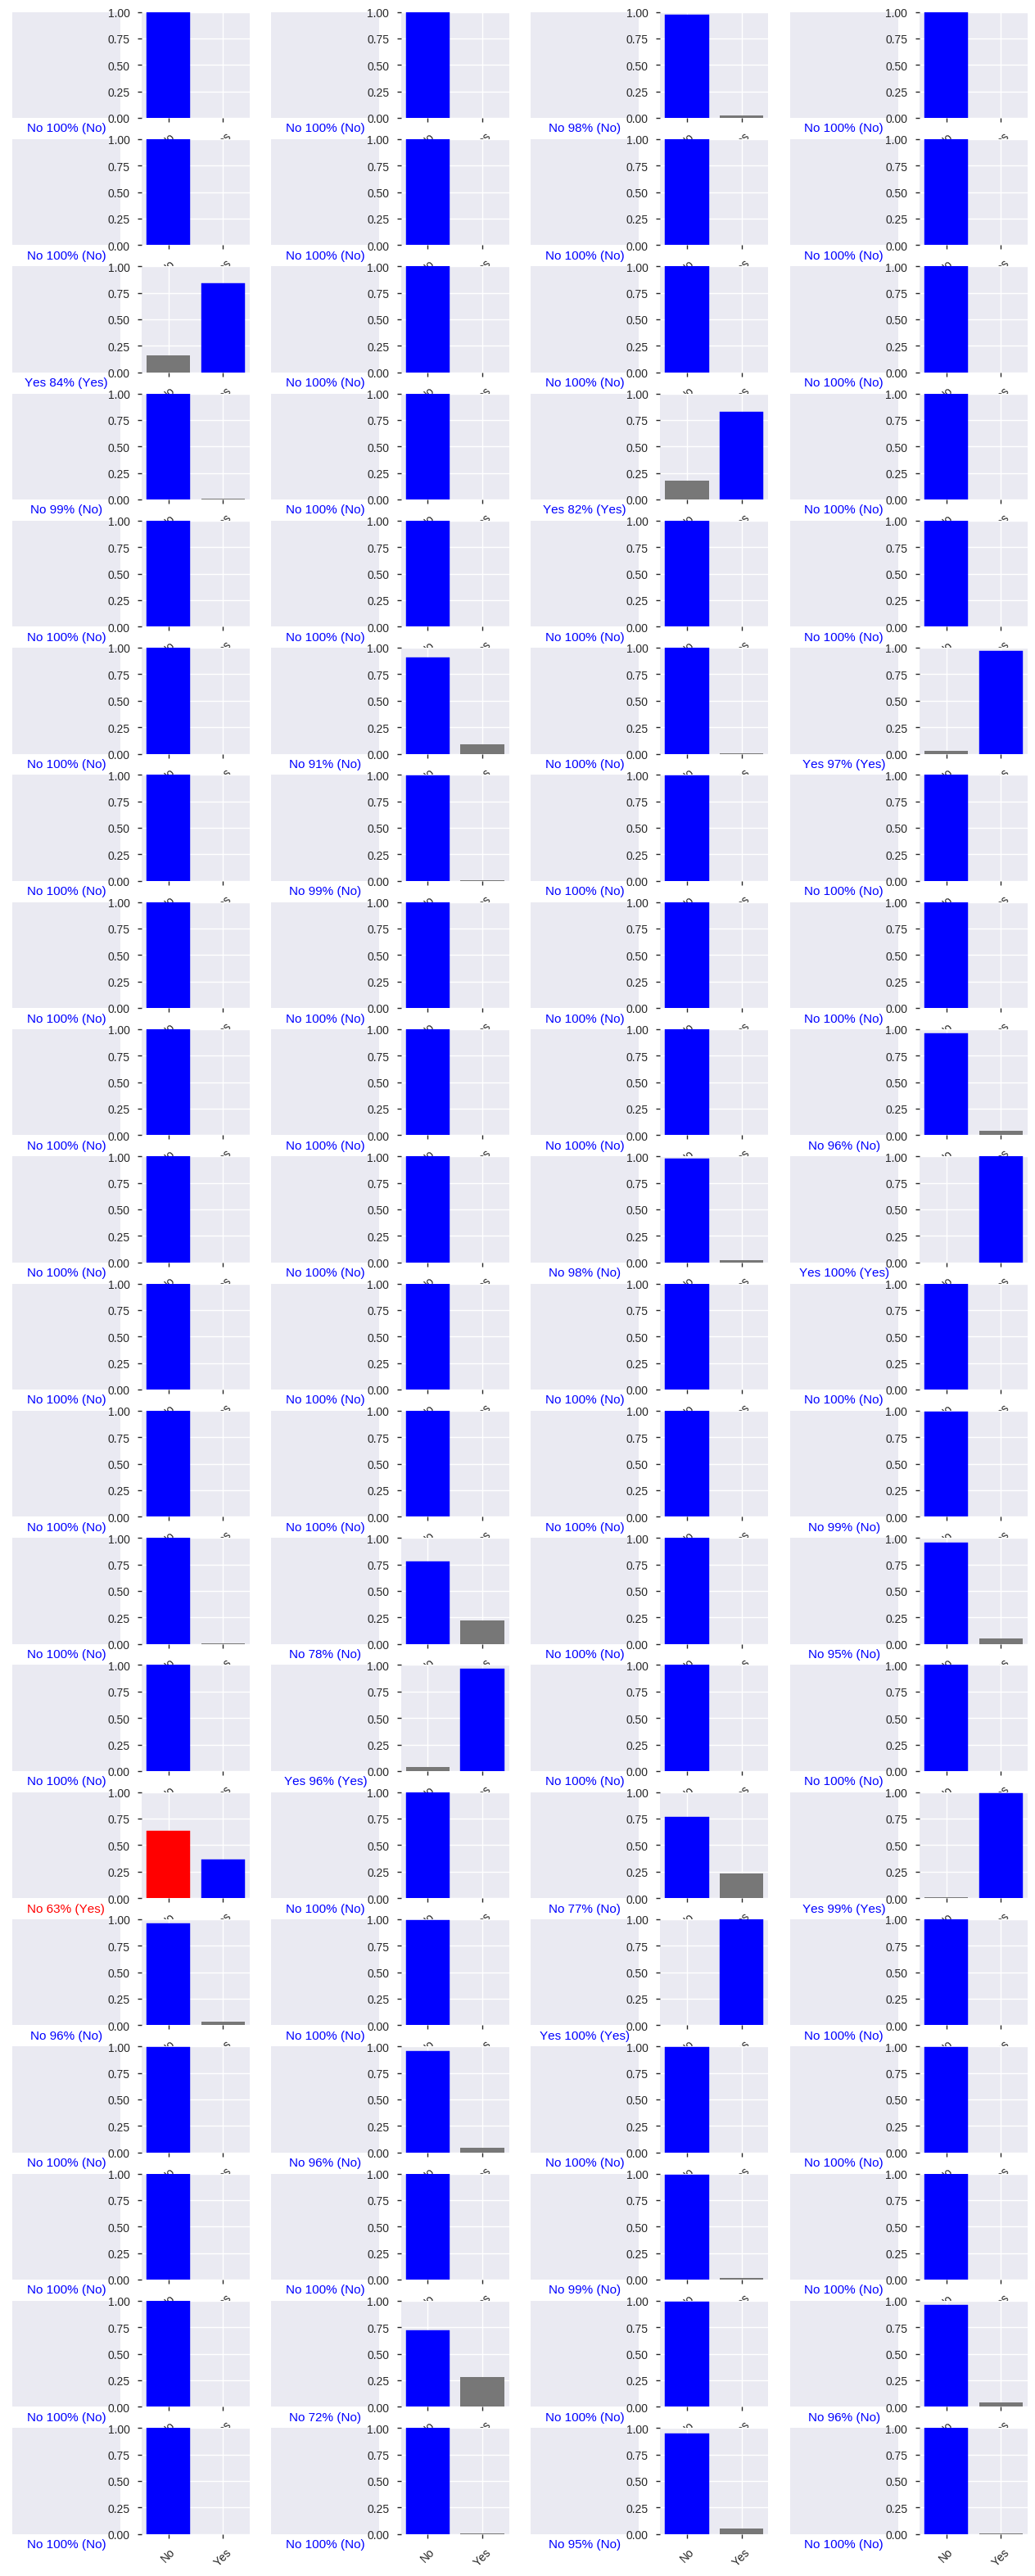

In [128]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, TestLabels_int)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, TestLabels_int)
  plt.xticks(range(2), class_names, rotation=45)
plt.show()

In [0]:
layer0 = model.get_layer(index=0)

In [130]:
layer0.get_weights()

[array([[ 0.3198519 ,  0.5937765 ,  0.02251299,  0.5449894 , -0.09896   ,
         -0.2060497 ,  0.41382906],
        [ 0.29517   ,  0.99830735,  0.0502322 ,  0.07035359,  0.9491286 ,
         -0.13519551, -0.22874796],
        [ 0.30186883, -0.55974454, -0.04624238,  0.4872442 ,  0.07558202,
         -0.3427805 ,  0.25123423],
        [-0.34045023, -0.7204281 ,  0.08880071,  0.5915589 ,  0.4517403 ,
         -0.40247428,  0.12320055],
        [ 0.61590064, -0.19732611, -0.03468506, -0.3815081 , -0.09679002,
          0.41572046,  0.63586694],
        [ 0.6670776 ,  0.2003568 ,  0.26213098,  0.48367816,  0.17857657,
          0.25360808, -0.48628643],
        [ 1.0427921 , -0.45078382,  0.23103479, -0.92921364,  1.0404097 ,
         -0.4881785 ,  0.646643  ],
        [ 0.82138735, -0.01247182, -1.6779773 ,  0.10518711,  1.3661647 ,
          0.14345668, -2.2665246 ],
        [ 0.19215174,  0.16392122, -1.214068  , -0.28068092, -0.38956502,
          0.52975756, -0.78838235],
        [ 

In [0]:
layer1 = model.get_layer(index=1)

In [132]:
layer1.get_weights()

[array([[-0.8351603 ,  0.6015736 ],
        [-1.8883294 ,  1.7541457 ],
        [ 2.2343922 , -2.497102  ],
        [ 1.8862075 , -1.3643975 ],
        [-1.7569355 ,  0.81411296],
        [ 1.333006  , -0.45154795],
        [ 3.0979776 , -3.068707  ]], dtype=float32),
 array([ 0.5690464 , -0.56904596], dtype=float32)]

In [0]:
#predictionsDF = pd.DataFrame(
#    data=predictions[1:,1:],    # values
#    index=predictions[1:,0],    # 1st column as index
#    columns=predictions[0,1:])  # 1st row as the column names

predictionsDF = pd.DataFrame(
    data=predictions)

In [0]:
predictionsDF.to_csv("Bank_Predictions.csv", encoding='utf-8', header=False, index=False)